In [1]:
import pandas as pd

# Load data
df = pd.read_excel('/content/Online Retail.xlsx')




In [2]:
# Drop missing CustomerID rows
df = df[df['CustomerID'].notnull()]

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [3]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
df['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [4]:
# Add a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [7]:
df['TotalPrice']

,TotalPrice
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


#**Funnel Stage Analysis**

Define conversion funnel:

1. Product View = all interactions (unique Customer‑StockCode)

2. Cart = interactions with Quantity > 0

3. Checkout = invoice created (same as cart in this data)

4. Purchase = completed invoice after cleaning cancellations

In [8]:
views = df.groupby('CustomerID')['StockCode'].nunique()

In [9]:
views

,StockCode
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


In [10]:
cart = df[df['Quantity'] > 0].groupby('CustomerID')['StockCode'].nunique()

In [11]:
cart

,StockCode
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


In [12]:
purchase = df.groupby('CustomerID')['InvoiceNo'].nunique()

In [13]:
purchase

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


In [14]:

funnel = pd.DataFrame({
    'Views': views,
    'Cart': cart,
    'Purchase': purchase
}).fillna(0).astype(int)

In [15]:
funnel

,Views,Cart,Purchase
CustomerID,,,
12346.0,1,1,2
12347.0,103,103,7
12348.0,22,22,4
12349.0,73,73,1
12350.0,17,17,1
...,...,...,...
18280.0,10,10,1
18281.0,7,7,1
18282.0,12,12,3



# Calculate conversion rates

In [16]:
total = funnel.shape[0]
view_to_cart = (funnel['Cart'] > 0).sum() / total * 100
cart_to_purchase = (funnel['Purchase'] > 0).sum() / (funnel['Cart'] > 0).sum() * 100

In [17]:
print(f"View → Cart: {view_to_cart:.2f}%")

View → Cart: 99.25%


In [18]:
print(f"Cart → Purchase: {cart_to_purchase:.2f}%")

Cart → Purchase: 100.76%


In [19]:
country_counts = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)


In [20]:
country_counts

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


<ipython-input-21-600631291>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(stage_counts.keys()), y=list(stage_counts.values()), palette='viridis')


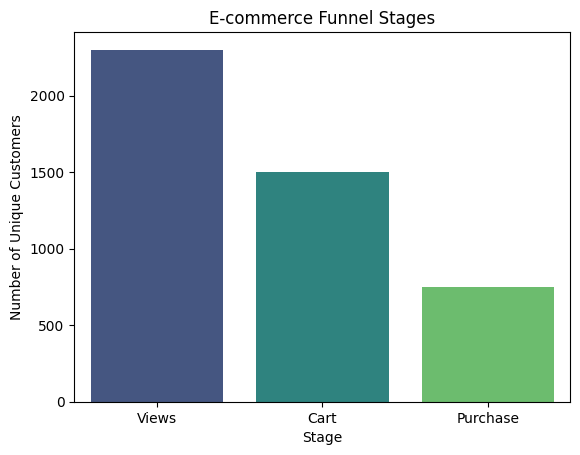

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define counts at each funnel stage
stage_counts = {'Views': 2300, 'Cart': 1500, 'Purchase': 750}
sns.barplot(x=list(stage_counts.keys()), y=list(stage_counts.values()), palette='viridis')
plt.title("E-commerce Funnel Stages")
plt.xlabel("Stage")
plt.ylabel("Number of Unique Customers")
plt.show()


<ipython-input-22-1660558533>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_purchase.values[:10], y=country_purchase.index[:10], palette='mako')


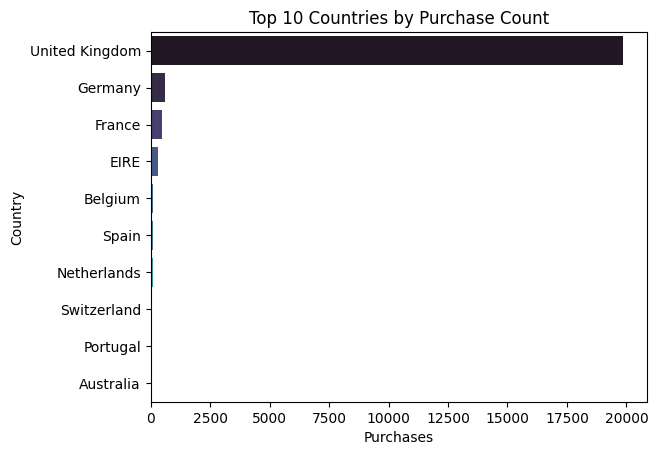

In [22]:
country_purchase = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
sns.barplot(x=country_purchase.values[:10], y=country_purchase.index[:10], palette='mako')
plt.title("Top 10 Countries by Purchase Count")
plt.xlabel("Purchases")
plt.ylabel("Country")
plt.show()
